# Practice Session : Kalman Filter de Rayane Dakhlaoui et Adam Chgour

In this session, we will code our own Kalman filter and try to study and apply it on simulated data. The first part is dedicated to code a Linear Gaussian Model simulator while the Second Part is about coding the Kalman Filter.

Instructions:
- Can be send in pairs or alone
- You can either complete the notebook by your own and send it under the name `Kalman_Practice-Session [NAMES].ipynb` where `[NAMES]` stands for your family name(s) or  `pdf` is fine.

## 1 - Linear Gaussian Model (LGM) Simulation

Let's consider at first the following Linear Gaussian Model (LGM) :

$$
\begin{cases}
X_0 \sim \mathcal{N}(m_0,P_0) \\
X_{k+1} = \Phi X_k + \epsilon_k\\
Y_{k+1} = \Psi X_{k+1} + \eta_{k+1} \\
\epsilon_k \sim \mathcal{N}(0,Q) \\
\eta_k \sim \mathcal{N}(0, R) 

\end{cases}\qquad \qquad \qquad (1)
$$

where the entries $X_0, (\epsilon_k)_{k\geq 0}, (\eta_k)_{k\geq 0}$ are independents.

The code hereafter generate $(X_{k+1}, Y_{k+1})$ knowning $X_k$.

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def lingauss_step(x_current, Phi, Psi, Q, R):
    """
    Generate (X_{k+1}, Y_{k+1}) in the linear Gaussian model.
    Arguments:
    Phi, Psi: matrices defining the state dynamics and observation model (of sizes (p,p) and (q,p) respectively)
    Q, R: variances of the noise for the state equation and observation equation.
    x_current: vector of size p
    Returns:
    x: a column vector (dimensions (p,1))
    y: a column vector (dimensions (q,1))
    """
    dim_state = len(x_current)
    dim_obs = Psi.shape[0]
    x_current = np.reshape(x_current, (dim_state, 1))
    mean_state = np.dot(Phi, x_current)
    x = my_mvnormrnd(mean_state, Q, 1)
    x = np.reshape(x, (dim_state, 1))
    mean_obs = np.dot(Psi, x)
    y = my_mvnormrnd(mean_obs, R, 1)
    y = np.reshape(y, (dim_obs, 1))
    return x, y

def my_mvnormrnd(mean, cov, num_samples):
    """
    Generate samples from a multivariate normal distribution.
    mean: mean vector
    cov: covariance matrix
    num_samples: number of samples to generate
    Returns:
    samples: generated samples
    """
    samples = np.random.multivariate_normal(mean.flatten(), cov, num_samples).T
    return samples


# # Define parameters
# x_0 = np.array([[1], [2], [3]])
# Phi = 0.1 * np.array([[1, 1, 0], [0, 1, 1], [0, 0, 1]])
# Psi = np.array([[1, 0, 0], [0, 1, 1]])
# cholQ = np.array([[0.5, 0.5, 0.5], [0, 1, 1], [0, 0, 1]])
# Q = np.dot(cholQ, cholQ.T)
# cholR = 0.5 * np.array([[1, 1], [0, 2]])
# R = np.dot(cholR, cholR.T)

# # Perform one iteration in the model
# x, y = lingauss_step(x_0, A, B, Q, R)
# print("x:", x)
# print("y:", y)

The function `lingauss_simul` is made to generate sample $(X_k, Y_k)_{k=1}^{T}$ for a fixed $T$ and given $x_0$.

In [48]:
def lingauss_simul(x_0, T, Phi, Psi, Q, R):
    """
    Generate the process ((X_{k}, Y_{k}), k = 1:T) in the linear Gaussian model.
    Arguments:
    Phi, Psi: Matrices defining the state dynamics and observation model (of sizes resp. (p,p) and (q,p))
    Q, R: Variances of the noise for the state equation and observation equation.
    x_0: Initial state
    T: Number of iterations
    Returns:
    X: a matrix of size (T,p)
    Y: a matrix of size (T,q)
    """
    dim_state = Phi.shape[0]
    dim_obs = Psi.shape[0]
    X = np.zeros((T, dim_state))
    Y = np.zeros((T, dim_obs))
    x = x_0

    for i in range(T):
        x, y = lingauss_step(x, Phi, Psi, Q, R)
        X[i, :] = x.flatten()
        Y[i, :] = y.flatten()

    return X, Y

1. <span style="font-weight:bold;">Application :</span> We consider states $X_{k}=(X_{k,1}, X_{k,2}, X_{k,3})$ and observation $Y_{k} = (Y_{k,1}, Y_{k,2})$ with $i \in \{1,2,3\}$ and $j \in \{1,2\}$:

\begin{cases}
X_{k+1, i} = X_{k,i} + \epsilon_{k,i} & \text{with } \epsilon_{k,i} \sim \mathcal{N}(0,\tau^2) \\
Y_{k+1, j} = X_{k+1,j} + \eta_{k, j} & \text{with } \eta_{k,j} \sim \mathcal{N}(0,\sigma^2)
\end{cases} \qquad \qquad \qquad (2)
<span style="font-weight:bold; color:red;">Answer the following questions:</span><br>
    1.1 Write the model in Eq. (2) under the form of Eq. (1) by specifying the parameters $\Phi, \Psi, Q$ and $R$.<br>
    1.2 Complete the following code to show trajectory of $T=100$ observations at first. Comment.<br>
    1.3 Varying the paramters $\sigma,\tau $ and $T$ and comment the results.<br>

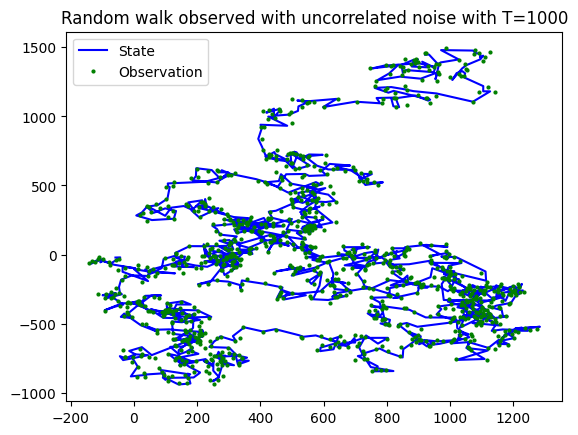

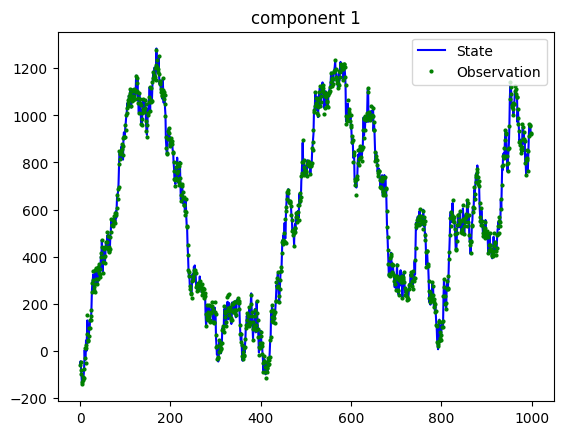

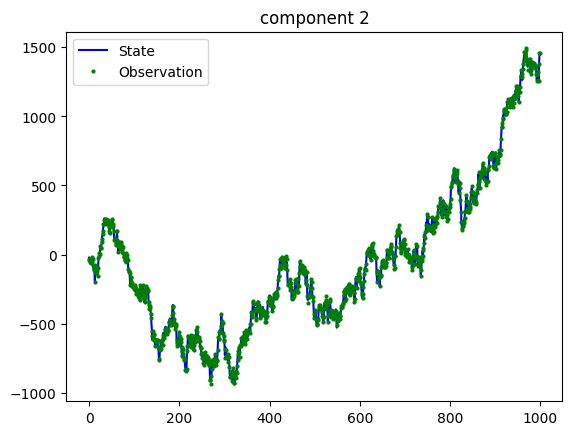

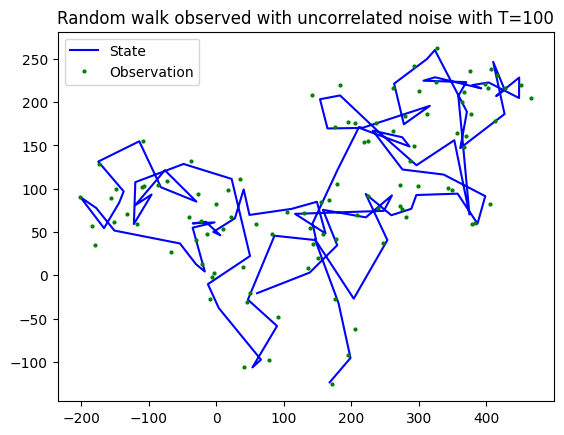

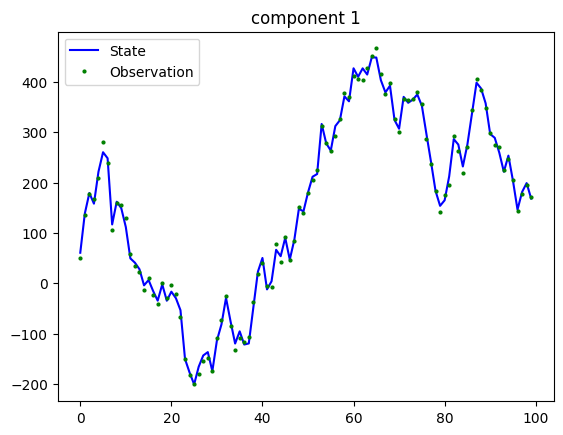

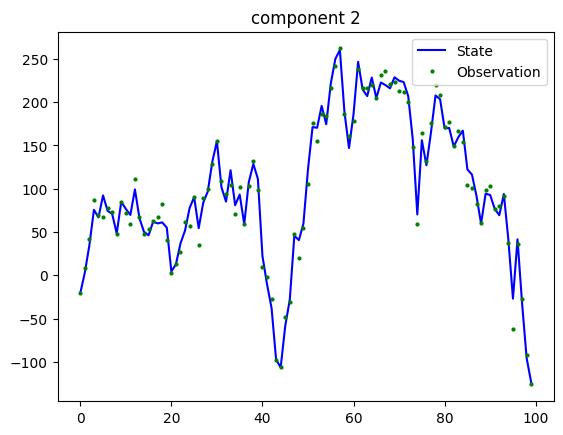

In [49]:
# A-1 parameters to modify
sigma = 10
tau = 40
x_0 = np.array([1, 2, -1])
T = 1000

sigma_1 = 10
tau_1 = 40
T_1 = 100

# A-2 structural parameters
Phi = np.identity(3)  # Replace with appropriate matrix for state model
Psi = np.array([[ 1.,  0.,  0.], [ 0.,  1.,  0.]])  # Replace with appropriate matrix for observation model
Q = (tau**2)*np.identity(3)  # Replace with appropriate covariance matrix for state equation
R = (sigma**2)*np.identity(2)  # Replace with appropriate covariance matrix for observation equation


# Perform simulation
X, Y = lingauss_simul(x_0, T, Phi, Psi, Q, R)
X_1, Y_1 = lingauss_simul(x_0, T_1, Phi, Psi, Q, R)

# Visualization
plt.figure(1)
plt.plot(X[:, 0], X[:, 1], 'b', label='State')
plt.plot(Y[:, 0], Y[:, 1], 'og', label='Observation', markersize=2)
plt.legend()
plt.title('Random walk observed with uncorrelated noise with T=1000')
plt.show()

for i in range(2):
    plt.figure(i+2)
    plt.plot(X[:, i], 'b', label='State')
    plt.plot(Y[:, i], 'og', label='Observation', markersize=2)
    plt.title(f'component {i+1}')
    plt.legend()
    plt.show()

plt.figure(1)
plt.plot(X_1[:, 0], X_1[:, 1], 'b', label='State')
plt.plot(Y_1[:, 0], Y_1[:, 1], 'og', label='Observation', markersize=2)
plt.legend()
plt.title('Random walk observed with uncorrelated noise with T=100')
plt.show()

for i in range(2):
    plt.figure(i+2)
    plt.plot(X_1[:, i], 'b', label='State')
    plt.plot(Y_1[:, i], 'og', label='Observation', markersize=2)
    plt.title(f'component {i+1}')
    plt.legend()
    plt.show()

On observe que les observations (points verts) sont proches mais bruitées par rapport aux états latents. On le voit assez bien pour T = 100.


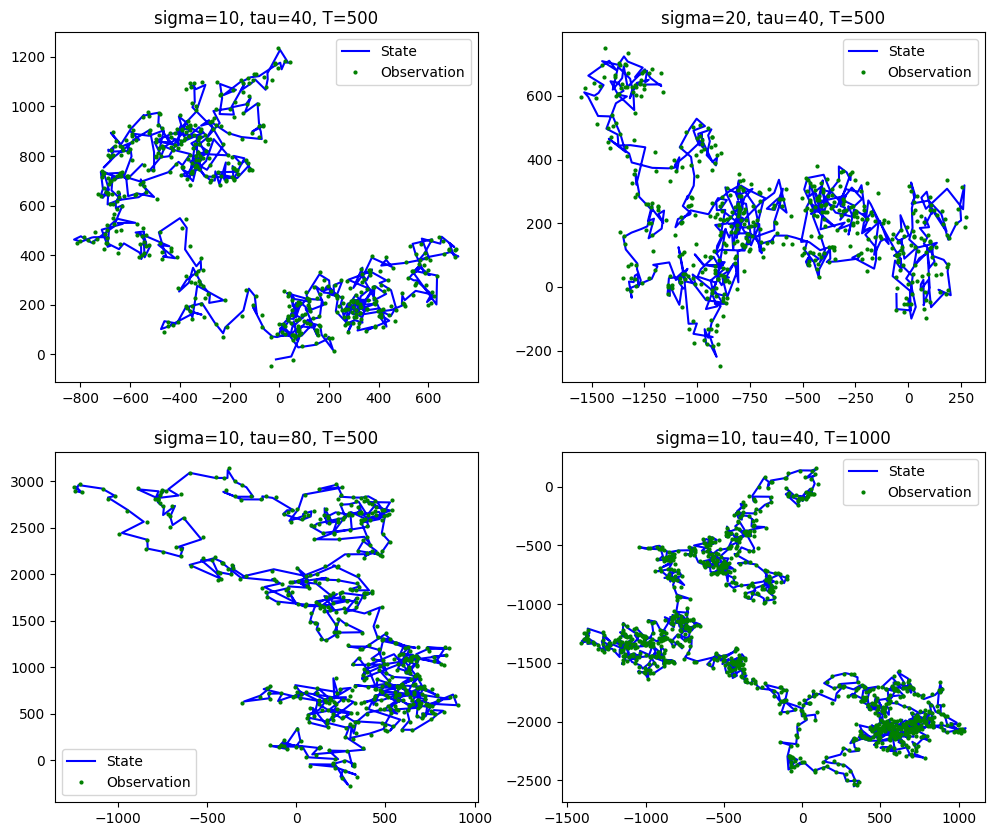

In [50]:
# 1.3 Effet de la variation de sigma, tau et T
params = [(10, 40, 500), (20, 40, 500), (10, 80, 500), (10, 40, 1000)]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for i, (sig, ta, t) in enumerate(params):
    Q = (ta ** 2) * np.identity(3)
    R = (sig ** 2) * np.identity(2)
    X, Y = lingauss_simul(x_0, t, Phi, Psi, Q, R)
    ax = axs[i // 2, i % 2]
    ax.plot(X[:, 0], X[:, 1], 'b', label='State')
    ax.plot(Y[:, 0], Y[:, 1], 'og', label='Observation', markersize=2)
    ax.set_title(f'sigma={sig}, tau={ta}, T={t}')
    ax.legend()
plt.show()

Observations :
 - Si sigma augmente, les observations sont plus dispersées autour des états.
 - Si T augmente, on observe une trajectoire plus longue et plus variée du processus.
 - Si tau est petit, les changements entre X_k et X_k+1 sont faibles, donc la trajectoire est plus douce.
 - Si tau est grand, les transitions sont plus importantes


# 2 - Kalman Filter
Let's code what we saw before [here](https://matfontaine.github.io/KALMAN/#/11). The two first line are called *the predictions* whereas 3., 4. and 5. are called *the updates*.

2.1. Complete the function `kalman_predict`

In [51]:
def kalman_predict(m, P, Phi, Q):
    """
    Perform the prediction step in the Kalman filter.
    Calculates the predictive distribution [X_{k+1} | Y_{1:k}].
    Arguments:
    m, P: mean and variance of the current filtering distribution (vector and matrix of size p respectively)
    Phi: p*p matrix defining the state dynamics
    Q: variance of the noise (p*p matrix) for the state equation
    Returns:
    mpred: column vector of size p * 1: mean of the predictive distribution.
    Ppred: p*p matrix: covariance of the predictive distribution.
    """
    dim_state = m.shape[0]
    m = np.reshape(m, (dim_state, 1))

    # Predicted mean
    mpred = np.dot(Phi, m)

    # Predicted covariance matrix
    Ppred = np.dot(np.dot(Phi, P), Phi.T) + Q

    return mpred, Ppred

2.2. Complete the function `kalman_update`  ($S_t$ corresponds to $\Psi_t\Sigma_{t \mid t_-1} \Psi_t^\top + R$ in the given notation. It is called the *innovation covariance*)

In [52]:
def kalman_update(y, mpred, Ppred, Phi, Psi, Q, R):
    """
    Kalman update step:
    Arguments:
    mpred, Ppred: mean and variance of the current predictive distribution (returned by 'kalman_predict')
    y: vector of size q: new observation
    Phi, Psi: Matrices p*p and q*p defining the state dynamics and observation model
    Q, R: Variances of the noise for the state equation and observation equation of sizes p and q respectively
    Returns:
    mu, Pu: mean and covariance matrix of the filtering distribution after the update step
    """
    dim_state = Phi.shape[0]
    dim_obs = Psi.shape[0]

    # Measurement residual (can be used to update mu)
    residual = y[:,None] - np.dot(Psi, mpred)

    # Innovation covariance
    S = np.dot(np.dot(Psi, Ppred), Psi.T) + R

    # Kalman gain
    K = np.dot(np.dot(Ppred, Psi.T), np.linalg.inv(S))

    # Updated mean
    mu = mpred + np.dot(K, residual)

    # Updated covariance matrix
    Pu = np.dot(np.identity(dim_state) - np.dot(K, Psi), Ppred)

    return mu, Pu

2.3. Finally, Write a function `kalman_filter` by completing the following model

In [53]:
def kalman_filter(Y, m_0, P_0, Phi, Psi, Q, R):
    """
    Kalman Filter:
    Sequentially filters observations Y to reconstruct the signal X.
    Arguments:
    Y: observations: a matrix T * q
    m_0: column vector of size p * 1: prior mean of the initial state
    P_0: p*p matrix: prior variance of the initial state
    Phi, Psi: matrices defining the state dynamics and observation model
    Q, R: variances of the noise for the state equation and observation equation.
    Returns:
    M: Matrix of size T * p: posterior means
    Parray: Array of dimension p*p*T of successive filtering covariance matrices
    """
    dim_state = Phi.shape[0]  # dimension of the states
    dim_obs = Psi.shape[0]  # dimension of the observations
    T = Y.shape[0]

    # Initialization
    P = P_0
    m = m_0
    M = np.zeros((T, dim_state))
    Parray = np.zeros((dim_state, dim_state, T))

    for k in range(T):
        # Prediction
        mpred, Ppred = kalman_predict(m, P, Phi, Q)

        # Update
        m, P = kalman_update(Y[k, :], mpred, Ppred, Phi, Psi, Q, R)

        # Reassignment of the current state
        mu = m
        Pu = P

        # Storage
        M[k, :] = mu.flatten()
        Parray[:, :, k] = Pu

    return M, Parray

**Application:** : Try your function `kalman_filter` on  data $Y$ generated through data in Exercise 1. You can use the code hereafter and answer the following questions: <br><br>
2.4. What do the two yellow stripes represent ?<br>
2.5. Try several set of paramterers $\sigma, \tau, T$ and observes the consequences on the filtering. 

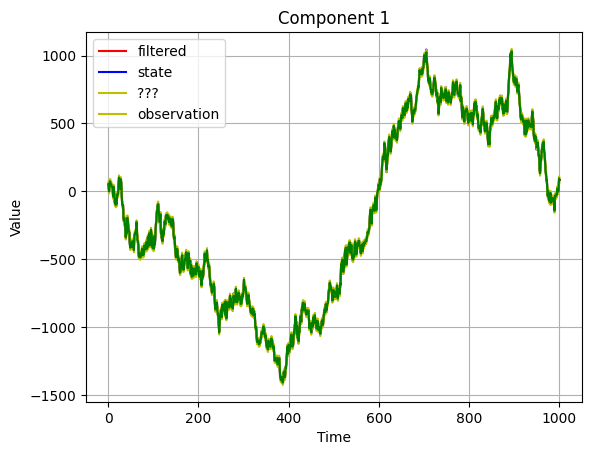

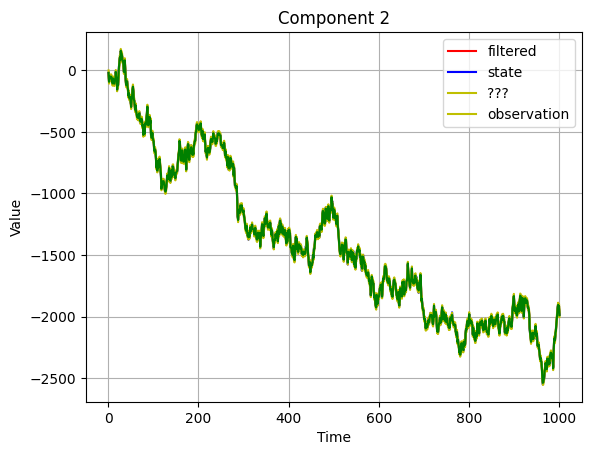

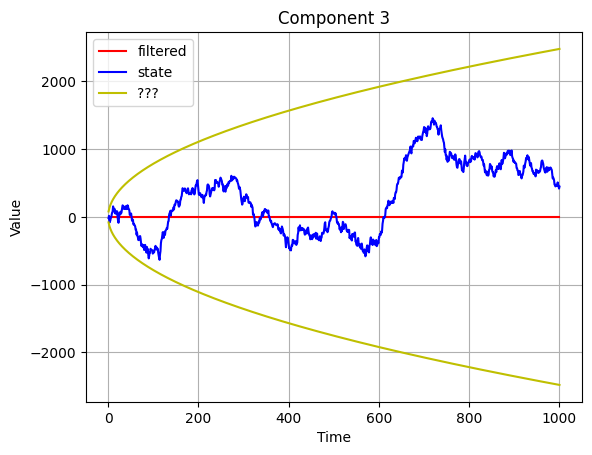

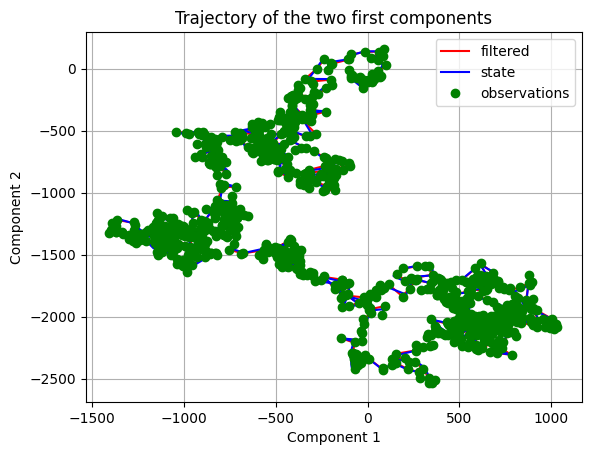

In [54]:
# Priors sur l'etat initial
m_0 = np.array([0, 0, 0])
P_0 = 100 * np.eye(3)

# Filtrage
M, Parray = kalman_filter(Y, m_0, P_0, Phi, Psi, Q, R)

# Visualisation
plt.close('all')
for i in range(3):
    plt.figure(i+1)
    plt.plot(range(1, T+1), M[:, i], 'r', label='filtered')
    plt.plot(range(1, T+1), X[:, i], 'b', label='state')
    sd = np.sqrt(Parray[i, i, :])
    plt.plot(range(1, T+1), M[:, i] + 1.96 * sd, 'y')
    plt.plot(range(1, T+1), M[:, i] - 1.96 * sd, 'y')
    if i < 2:
        plt.plot(range(1, T+1), Y[:, i], 'g')
        plt.legend(['filtered', 'state', '???', 'observation'])
    else:
        plt.legend(['filtered', 'state', '???'])
    plt.title(f'Component {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

plt.figure(4)
plt.plot(M[:, 0], M[:, 1], 'r', label='filtered')
plt.plot(X[:, 0], X[:, 1], 'b', label='state')
plt.plot(Y[:, 0], Y[:, 1], 'og', label='observations')
plt.title('Trajectory of the two first components')
plt.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

Question 2.4 : 

C'est intervalle de confiance à 5% pour une distribution gausienne

Question 2.5 :

- Comme précédemment T correspond à la durée de la simulation.
- Si tau augmente, le filtre de Kalman considère que l'état réel du système devient plus aléatoire. Les prédictions du filtre sont moins précises. A l'inverse, si tau diminue, le filtre de Kalman considère que l'état change peu, et donne plus de poids aux prédictions précédentes.
-  Si sigma augmente, les observations seront plus bruitées, et donc les mesures moins précises. Le filtre accorde donc moins de confiance aux observations et se base davantage sur les modèles d'état. A l'inverse, si sigma diminue, les observations deviennent de plus en plus stables.

# 3 - Modification of the observation

The observation problem is modified as follows: instead of observing the 'projection' of the random walk onto the plane $(O, x1, x2)$, we observe its projection onto a plane that has undergone two successive rotations of angles $\varphi_B$ and $\vartheta_B$ around the axes $(Oy)$ and $(Ox)$. This modification corresponds to a new observation matrix $\Psi$ defined as follows (with arbitrary values of $\varphi_B$ and $\vartheta_B$) 

In [55]:
# Define rotation angles
azi_Psi = np.pi / 3
elev_Psi = np.pi / 3

# Define rotation matrices
Rx = np.array([[1, 0, 0],
               [0, np.cos(azi_Psi), -np.sin(azi_Psi)],
               [0, np.sin(azi_Psi), np.cos(azi_Psi)]])
Ry = np.array([[np.cos(elev_Psi), 0, -np.sin(elev_Psi)],
               [0, 1, 0],
               [np.sin(elev_Psi), 0, np.cos(elev_Psi)]])

Psi = Psi @ Rx @ Ry
print(Psi)

[[ 0.5        0.        -0.8660254]
 [-0.75       0.5       -0.4330127]]


Questions:
3. Explain briefly what is the difference with the previous observation matrix. (you can use for instance the filtering results of the different component to explain what you observe)

La matrice Phi prend en compte deux rotations successives, définies par les matrices de rotations Rx et Ry, respectivement autour des axes Ox et Oy.
Les observations sont des projections sur un plan incliné à cause des rotations.

Cela permet d'avoir une observation qui n'est plus combinaison linéaire de deux composantes mais de trois. Le filtre de Kalman donne un résultat plus précis.